# Bài 8: Plotting - Part 1 (Matplotlib)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Matplotlib anatomy

### 1.1. Overview
- Một plot hoàn thiện được gọi là một `Figure`
- Mỗi `Figure` chứa một hoặc nhiều `Axes`.
- Một `Axes` là một phần diện tích, thể tích mà một điểm (point) có thể được xác định thông qua tọa độ.
    - x, y với 2D plots
    - x, y, z với 3D plots
    - theta, r với polar plots
- Trong phần này ta chỉ quan tâm đến 2D plots
- Mỗi `Axes` chứa các `Axis` (`XAxis` và `YAxis`)
- Mỗi `Axis` chứa các thành phần liên quan đến trục số như ticks, tick locations, labels, ...

### 1.2. Simple examples (no data)

#### a) Figure

In [2]:
# A blank Figure with no Axes
fig = plt.figure()   # red background to see where the figure is
plt.show()

<Figure size 432x288 with 0 Axes>

#### b) Axes

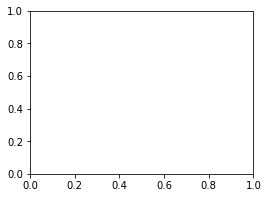

In [3]:
# A Figure with one blank Axes (most common scenario)
fig, ax = plt.subplots(figsize=(4, 3))
plt.show()

#### c) Add properties to `Axes`

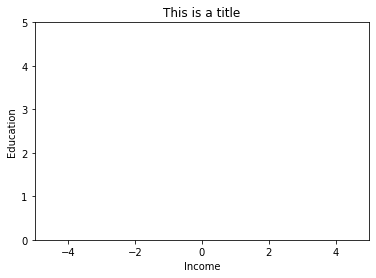

In [4]:
# Khởi tạo 1 figure chứa 1 Axes
fig, ax = plt.subplots()

# Set title cho Axes
ax.set_title("This is a title")

# Set limits cho các trục tọa độ
ax.set_xlim(-5, 5)
ax.set_ylim(0, 5)

# Set labels cho các trục tọa độ
ax.set_xlabel("Income")
ax.set_ylabel("Education")

# Show
plt.show()

#### d) More customization

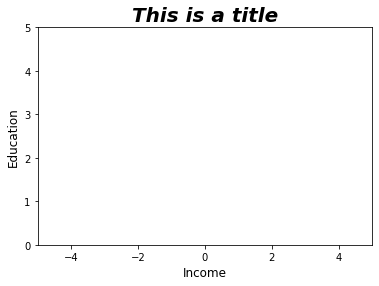

In [5]:
# Khởi tạo 1 figure chứa 1 Axes
fig, ax = plt.subplots()

# Set title cho Axes
ax.set_title(
    "This is a title", 
    fontsize=20, 
    fontweight="bold", 
    fontstyle="italic"
)

# Set limits cho các trục tọa độ
ax.set_xlim(-5, 5)
ax.set_ylim(0, 5)

# Set labels cho các trục tọa độ
ax.set_xlabel("Income", fontsize=12)
ax.set_ylabel("Education", fontsize=12)

# Show
plt.show()

### 1.3. Simple examples (with data)

In [6]:
# Data
x = np.arange(-5, 5.01, .5)
y = x + 1
y2 = x**2 + 1

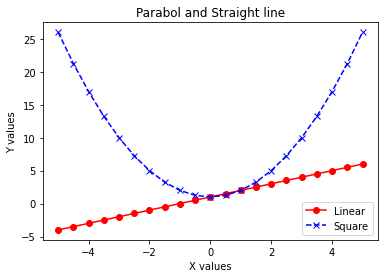

In [7]:
# Part 1: khởi tạo figure, axes
fig, ax = plt.subplots(figsize=(6, 4))

# Step 2: Plot data (vẽ vào ax)
ax.plot(x, y, color="red", marker="o", label="Linear")
ax.plot(x, y2, color="blue", linestyle="dashed", marker="x", label="Square")

# Step 3: Decoration
ax.set_title("Parabol and Straight line")
ax.set_xlabel("X values")
ax.set_ylabel("Y values")
plt.legend(loc="lower right")

# Step 4: Show or save
plt.savefig("parabol_line.png", dpi=300)
plt.show()

### 1.4. Summary of components of a Figure

<img src="https://matplotlib.org/3.2.1/_images/sphx_glr_anatomy_001.png" style="height: 500px;">

#### Figure

- Plot là the whole `Figure` (coi Figure như là cả container chứa toàn bộ mọi thứ bên trong)
- Trong `Figure` gồm nhiều `Axes` (là phần diện tích nơi mà points có thể xác định qua coordinates)
- Trong mỗi `Axes` có chứa các `Artist` (title, lables, ticks, ...)
- Best practices khi tạo plots:
    ```python
    fig = plt.figure() # An empty Figure with no Axes
    fig, ax = plt.subplots() # A Figure with a single Axes
    fig, axs = plt.subplots(2, 2) # A Figure with a 2x2 grid of 4 Axes
    ```

#### Axes
- Đây chính là một plot.
- Một `Figure` có thể có nhiều `Axes`, nhưng một `Axes` chỉ thuộc một `Figure`.
- Mỗi `Axes` sẽ chứa các `Axis`:
    - 2D `Axes` chứa 2 `Axis` (cho x, y)
    - 3D `Axes` chứa 3 `Axis` (cho x, y, z)
- Tạm thời bài này ta chỉ quan tâm đến 2D plots
- Mỗi `Axes` có thể được set thuộc tính thông qua các phương thức như:
    - `.set_title()`
    - `.set_xlabel()`
    - `.set_ylabel()`
    - `.set_xlim()`
    - `.set_ylim()`
    - ...

## 2. Two common styles and confusion
- Phần này lấy ví dụ vẽ cùng plot bởi 2 styles: OOP và pyplot
- Recommend dùng OOP style
- Sau phần này, các VD đều được trình bày theo OOP style

In [8]:
# Generate data
x = np.linspace(0, 5, 100)
print(len(x))
print(x)

100
[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.

### 2.1. OOP style
- Object oriented programming style (recommended)

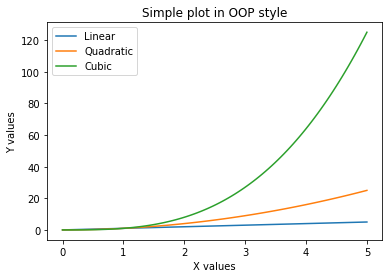

In [9]:
# Make Figure and Axes
fig, ax = plt.subplots()

# Plot data
ax.plot(x, x, label="Linear") # line
ax.plot(x, x**2, label="Quadratic")
ax.plot(x, x**3, label="Cubic")

# Decorate plot
ax.set_xlabel("X values")
ax.set_ylabel("Y values")
ax.set_title("Simple plot in OOP style")
plt.legend() # Show legend

# Show
plt.show()

### 2.2. pyplot style

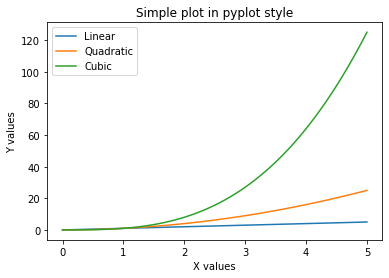

In [10]:
# Plot data
plt.plot(x, x, label="Linear")
plt.plot(x, x**2, label="Quadratic")
plt.plot(x, x**3, label="Cubic")

# Decorate plot
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple plot in pyplot style")
plt.legend()

plt.show()

### 2.3. Which one is better?
- Pyplot style is simpler, but less flexible for complicated plots
- OOP style is more flexible and helps you understand the fundamentals of Matplotlib better, but it requires more typing
- Pick one style and stick with it, don't mix them together
- pyplot style is better for interactive plotting
- OOP style is better for non-interactive plotting (in functions and scripts)

## 3. Matplotlib backend

- *Frontend* (scripting layer): là code mà user viết để specify plots
- *Backend* (backend layer): là cơ chế phía dưới mà Matplotlib dùng để generates actual plots ứng với từng loại output khác nhau. VD:
    - Inline plots in Jupyter Notebook (inline, notebook)
    - PDF files
    - PNG files
    - Widow popup plots
- Backend quy định cách plot được generate và cách người dùng tương tác với plots.
- Có 2 loại backends:
    - User interface backends (or interactive backends): tạo plots trong môi trường interactive như Jupyter (pygtk, wxpython, tkinter, qt4, ...)
    - Hardcopy backends: tạo output file ảnh (png, pdf, svg, ...)
- Để save plots với hardcopy backend, sử dụng `plt.savefig()`

### 3.1. Interactive backend

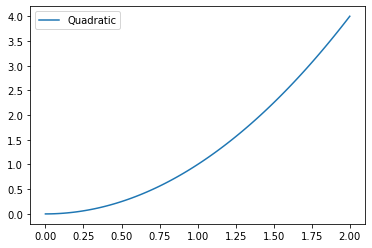

In [11]:
x = np.linspace(0, 2, 100)
plt.plot(x, x**2, label="Quadratic")

plt.legend()
plt.show()

### 3.2. Hardcopy backend

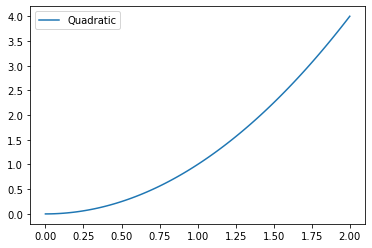

In [12]:
x = np.linspace(0, 2, 100)
plt.plot(x, x**2, label="Quadratic")

plt.legend() # Show legend
plt.savefig("quadratic.png", dpi=600, bbox_inches="tight") # Save PNG
plt.savefig("quadratic.pdf", dpi=600, bbox_inches="tight") # Save PDF

## 4. Multi-subplots in one Figure

### VD1

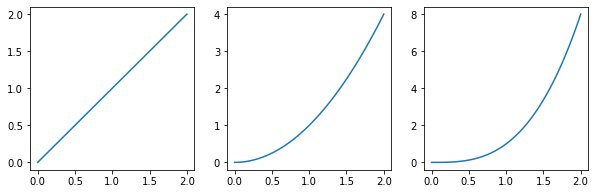

In [13]:
# Tạo 1 figure có 3 Axes
# 1 hàng, 3 cột
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

# Vẽ từng plot vào từng axes
ax[0].plot(x, x)
ax[1].plot(x, x**2)
ax[2].plot(x, x**3)

# Show
plt.show()

## VD2

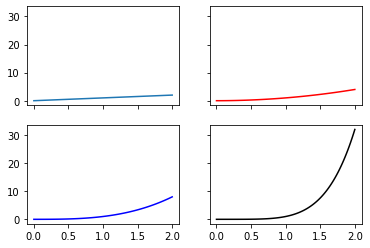

In [14]:
# Tạo 1 figure có 4 Axes
# 2 hàng, 2 cột
# Share X, Share Y
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

# Vẽ 4 plots vào 4 Axes
ax[0, 0].plot(x, x)
ax[0, 1].plot(x, x**2, color="red")
ax[1, 0].plot(x, x**3, color="blue")
ax[1, 1].plot(x, x**5, color="black")

# Show
plt.show()

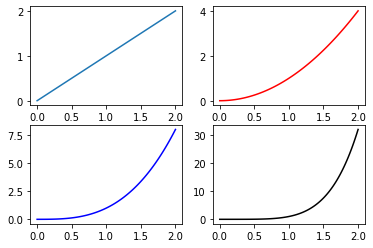

In [15]:
# Ví dụ trên nhưng tắt share X, share Y
fig, ax = plt.subplots(2, 2)

# Plot
ax[0, 0].plot(x, x)
ax[0, 1].plot(x, x**2, color="red")
ax[1, 0].plot(x, x**3, color="blue")
ax[1, 1].plot(x, x**5, color="black")

# Show
plt.show()

### VD3

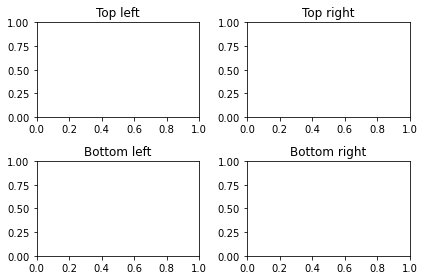

In [16]:
# Tạo fig, axes
fig, axes = plt.subplots(2, 2)

# Decorate cho từng plot
axes[0, 0].set_title("Top left")
axes[0, 1].set_title("Top right")
axes[1, 0].set_title("Bottom left")
axes[1, 1].set_title("Bottom right")

# Avoid overlapping labels 
fig.tight_layout() # try commenting this

plt.show()

### VD 4

In [17]:
# Set seed
np.random.seed(1)

# Randomly generate 2 samples from standard normal 
# (each have 100 points)
data = np.random.randn(2, 100)

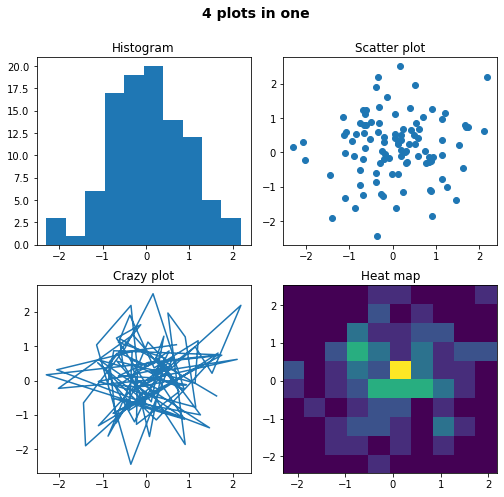

In [18]:
# Create a figure with 4 axes (4 subplots)
# Overal Figure has size of 5x5 inch
fig, axes = plt.subplots(2, 2, figsize=(7, 7), sharey=False)

# Subplot top left
axes[0, 0].hist(data[0])
axes[0, 0].set_title("Histogram")

# Subplot top right
axes[0, 1].scatter(data[0], data[1])
axes[0, 1].set_title("Scatter plot")

# Subplot bottom left
axes[1, 0].plot(data[0], data[1])
axes[1, 0].set_title("Crazy plot")

# Subplot bottom right
axes[1, 1].hist2d(data[0], data[1])
axes[1, 1].set_title("Heat map")

# # Set overall title for the figure
fig.suptitle("4 plots in one", fontsize=14, fontweight="bold")
fig.tight_layout() # Avoid overlap between subplots (try commenting this)

# # Make subplots only 88% of the canvas from the top to leave room for super title
fig.subplots_adjust(top=.88)

plt.show()

## 5. Plotting với Pandas
- Thông thường data gặp trong thực tế ở dạng Pandas Series hoặc DataFrame
- Cách plot cũng tương tự như đã học, gồm 4 bước:
    1. Tạo fig, ax
    1. Plot data
    1. Decorate subplots
    1. Save or show

### 5.1. Plot với Series

In [19]:
# Load data
df = sns.load_dataset("tips")
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


#### VD1: barplot số bữa ăn theo day

In [20]:
# Prepare data
data = df["day"].value_counts()
data

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

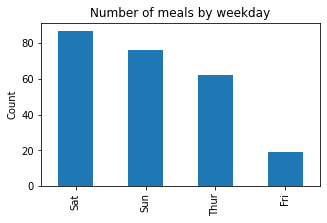

In [21]:
# Step 1: fig, ax
fig, ax = plt.subplots(figsize=(5, 3))

# Step 2: plot data
# Index go into X axis
# Values go into Y axis
data.plot.bar(ax=ax) 

# Step 3: decorate
ax.set_title("Number of meals by weekday")
ax.set_ylabel("Count")

# Step 4: Show
plt.show()

#### VD2: vẽ piechart cho VD1

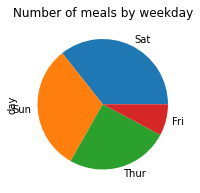

In [22]:
# Step 1: fig, ax
fig, ax = plt.subplots(figsize=(5, 3))

# Step 2: plot data
# Index go into X axis
# Values go into Y axis
data.plot.pie(ax=ax) 

# Step 3: decorate
ax.set_title("Number of meals by weekday")

# Step 4: Show
plt.show()

### 5.2. Plot với DataFrame

In [23]:
# View data
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


#### VD1: vẽ scatter plot `x=total_bill`, `y=tip`

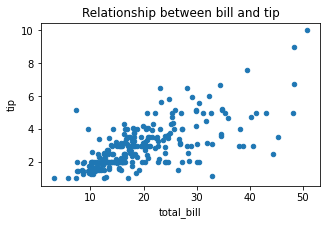

In [24]:
# Step 1: fig, ax
fig, ax = plt.subplots(figsize=(5, 3))

# Step 2: plot data
df.plot.scatter(x="total_bill", y="tip", ax=ax) 

# Step 3: decorate
ax.set_title("Relationship between bill and tip")

# Step 4: Show
plt.show()

## 6. Further readings
- https://pbpython.com/effective-matplotlib.html
- https://github.com/matplotlib/AnatomyOfMatplotlib